# Previsão de Churn de Clientes


#### Carregando Bibliotecas

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Carregando o dado


In [5]:
df = pd.read_csv('dados\dado.csv') # Carregando o dados 
df.head() #visualizando as 5 primeiras linhas do dados


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Michael\AppData\Local\Temp\ipykernel_27652\1849149580.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('dados\dado.csv') # Carregando o dados


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Limpeza do dados

### Informações das variáveis

In [63]:
df.info() #tipos de dados


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Vendo se há dados nullos

In [64]:
df.isnull().sum() #valores nulos

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Verificando todos os valores únicos de cada coluna para ver se há preenchido com valores errados ou em branco.

In [ ]:

for coluna in df.columns:
    print(f"Coluna: {coluna}")
    print(df[coluna].unique())
    print("-" * 50)

Coluna: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
Coluna: gender
['Female' 'Male']
--------------------------------------------------
Coluna: SeniorCitizen
[0 1]
--------------------------------------------------
Coluna: Partner
['Yes' 'No']
--------------------------------------------------
Coluna: Dependents
['No' 'Yes']
--------------------------------------------------
Coluna: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
Coluna: PhoneService
['No' 'Yes']
--------------------------------------------------
Coluna: MultipleLines
['No phone service' 'No' 'Yes']
--------------------------------------------------
Coluna: InternetService
['DSL' 'Fiber o

### Verificando todos os valores únicos de cada coluna para ver se há preenchido com valores errados ou em branco.

In [ ]:

print(df['TotalCharges'].astype(str).str.isspace().any())

True


### Descobrindo quais linhas estão com TotalCharges vazio.

In [ ]:

linha_em_branco = df[df['TotalCharges'].astype(str).str.strip() == ""]
print(linha_em_branco)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

### # Como são 11 linhas com valores vazios com a tabela "tenure" = 0 resolvei preencher a coluna TotalCharges = 0

In [ ]:

df['TotalCharges'] = df['TotalCharges'].replace(' ',float('0'))


### Converte a coluna TotalCharges para numérico

In [ ]:

df['TotalCharges'] = pd.to_numeric(df["TotalCharges"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Transformar variáveis categóricas

In [ ]:

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["gender"] = df["gender"].map({"Female": 0, "Male": 1})
df["Partner"] = df["Partner"].map({"Yes": 1, "No": 0})
df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0})
df["PhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0})
df["MultipleLines"] = df["MultipleLines"].map({"No phone service": -1, "Yes": 1, "No": 0})
df["InternetService"] = df["InternetService"].map({"Fiber optic": 2, "DSL": 1, "No": 0})
df["OnlineSecurity"] = df["OnlineSecurity"].map({"No internet service": -1, "Yes": 1, "No": 0})
df["OnlineBackup"] = df["OnlineBackup"].map({"No internet service": -1, "Yes": 1, "No": 0})
df["DeviceProtection"] = df["DeviceProtection"].map({"No internet service": -1, "Yes": 1, "No": 0})
df["TechSupport"] = df["TechSupport"].map({"No internet service": -1, "Yes": 1, "No": 0})
df["StreamingTV"] = df["StreamingTV"].map({"No internet service": -1, "Yes": 1, "No": 0})
df["StreamingMovies"] = df["StreamingMovies"].map({"No internet service": -1, "Yes": 1, "No": 0})
df["Contract"] = df["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})  
df["PaperlessBilling"] = df["PaperlessBilling"].map({"Yes": 1, "No": 0})
df["PaymentMethod"] = df["PaymentMethod"].map({
    "Electronic check": 0,
    "Mailed check": 1,
    "Bank transfer (automatic)": 2, 
    "Credit card (automatic)": 3
})

## ANÁLISE EXPLORATÓRIA (EDA)

### Distribuição do target (Churn)

C:\Users\Michael\AppData\Local\Temp\ipykernel_26060\228800010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette="Set2")


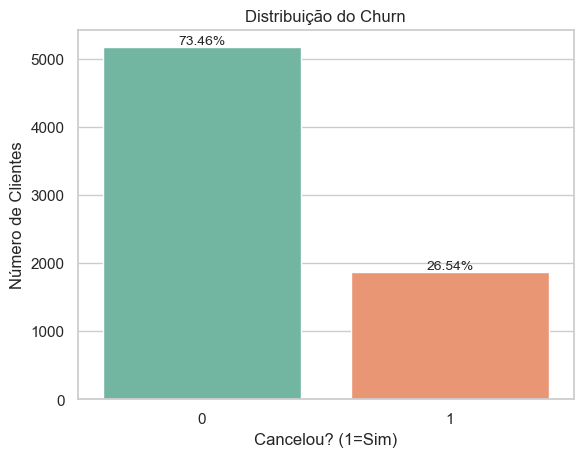

In [ ]:

total = len(df)


ax = sns.countplot(x='Churn', data=df, palette="Set2")
plt.title("Distribuição do Churn")
plt.xlabel("Cancelou? (1=Sim)")
plt.ylabel("Número de Clientes", fontsize=12)


for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.show()



Churn total: 26,53%

A maioria dos clientes permanece na base (73,47%).

Isso indica uma taxa de retenção relativamente boa, mas ainda assim o churn é significativo e merece atenção — especialmente para contratos mensais, como vimos anteriormente.

### Análise por contrato

C:\Users\Michael\AppData\Local\Temp\ipykernel_26060\4247474383.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Mensal', 'Anual', 'Bianual'])


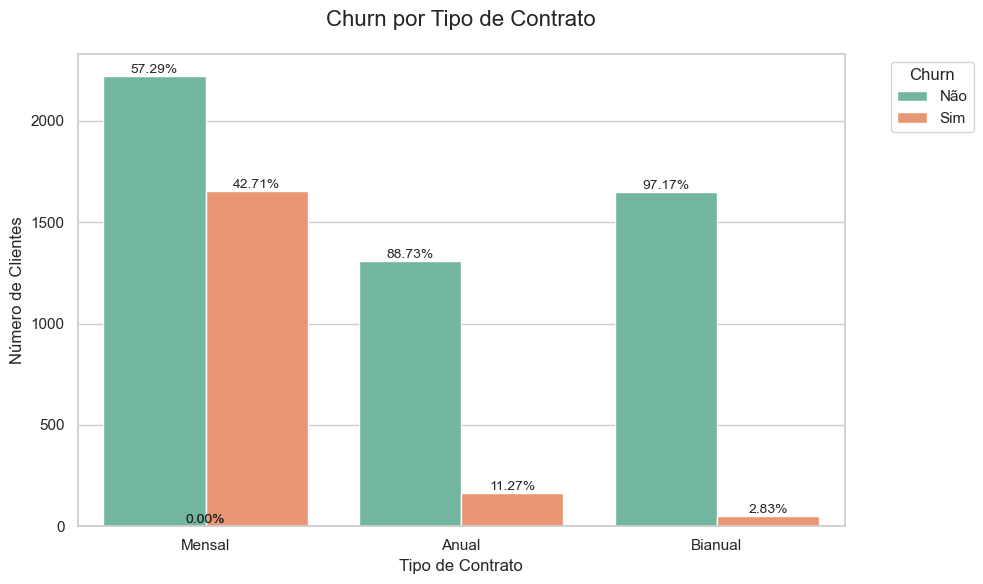

In [ ]:

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Contract', hue='Churn', data=df, palette="Set2")
ax.set_xticklabels(['Mensal', 'Anual', 'Bianual'])
plt.title("Churn por Tipo de Contrato", fontsize=16, pad=20)
plt.xlabel("Tipo de Contrato", fontsize=12)
plt.ylabel("Número de Clientes", fontsize=12)

plt.legend(title='Churn', labels=['Não', 'Sim'], bbox_to_anchor=(1.05, 1), loc='upper left')


x_categories = list(df['Contract'].unique())  

# Cria um dicionário de totais por categoria
contract_totals = df['Contract'].value_counts().to_dict()


for p in ax.patches:
    height = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2.
    bar_index = int(round(x_pos))
    
    if bar_index < len(x_categories):
        contract_label = x_categories[bar_index]
        total = contract_totals.get(contract_label, 0)

        if total > 0:
            percentage = f'{100 * height / total:.2f}%'
            ax.annotate(percentage, 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


| Tipo de Contrato | Taxa de Churn (%) |
| ---------------- | ----------------- |
| Mensal           | **42,71%**        |
| Anual            | **11,27%**        |
| Bianual          | **2,83%**         |

O gráfico revela uma relação inversa entre a duração do contrato e a taxa de churn: quanto mais longo o contrato, menor a probabilidade de cancelamento. Contratos mensais apresentam maior vulnerabilidade ao churn, enquanto contratos bianuais são os mais estáveis.

### Salvando dados para modelagem

In [102]:
import pandas as pd

# Suponha que 'df' seja o DataFrame com os dados preparados
df.to_csv('dados/dados_preparados.csv', index=False)
